<a href="https://colab.research.google.com/github/dongchanlim/Capstone_Coca_Cola/blob/main/Individual_EDA_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Table of Contents

>[Table of Contents](#scrollTo=8ZHYR1PYhOvg)

>>>[Import Packages](#scrollTo=6bPDSyZmoGl4)

>>[Introduction](#scrollTo=WJAjUmtVDPhy)

>>>[Background](#scrollTo=aauUjn_GmrdC)

>>>[Requirements](#scrollTo=5NkkGqwaYqQM)

>>>[Import Data](#scrollTo=f6iVCKMtoAAw)

>>>[Date type coversion](#scrollTo=wdZW3n2bPhd-)

>>[Description of Entire Data](#scrollTo=pxXfLW4JCXBK)

>>>[Metadata](#scrollTo=GNt7txExmpTC)

>>[Handling Missing data](#scrollTo=OhDlj7AwCmyS)

>>[Exploratory visualizations and/or summary tables](#scrollTo=hkyshRt6DTdq)

>>>[Execution Time Pattern](#scrollTo=5184nso0lkFT)

>>>[Production Location (Plant) Distribution](#scrollTo=denH1qpmdnQH)

>>>[Actual work time in minutes](#scrollTo=vS__isyWeJGi)

>>>[Maintainance Activity Type (Planned vs Unplanned)](#scrollTo=uqX0V4kyf3sq)

>>>[Fuctional Location Code Frequency](#scrollTo=hAPRIj8olJC8)

>>>[Unplanned maintenance orders](#scrollTo=R3gHY1NngEl7)

>>[Order Description](#scrollTo=piKhHRxmo5Qq)

>>[Summary](#scrollTo=uEltcAiqmOmB)



### Import Packages

In [ ]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from wordcloud import WordCloud
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

## Introduction


### Background
**State the project goal and summarize the business and analytic problems.**

In Swire Coca-Cola's production processes, manufacturing machines occasionally face unexpected mechanical breakdowns, leading to nearly $60 million in annual losses.

By analyzing the downtimes recorded in the Internal Warehouse Controller (IWC), we aim to understand the severity of these downtimes across different plants, identify the factors causing the breakdowns, and explore preventive methods to reduce the associated opportunity costs.

### Requirements
**State the purpose of the EDA notebook and the questions about the data that you will be exploring.**

EDA notebook aim to identify the main causes and answer the following questions.

- Are there any time-related patterns in maintenance issues over the given time period?
- How long does maintenance time take per each plant (production location) in average?
- What is the average and median maintenance time to resolve issues, and how much longer do unplanned issues take compared to planned ones?
- Which plant has the most frequent maintenance issues, and what factors contribute to this?
- Which component/part is most vulnerable within the manufacurting process?

### Import Data

In [ ]:
df = pd.read_csv('IWC_Work_Orders_Extract.csv')

### Data feature generation & conversion

In [ ]:
# Convert numeric data to date type data
df['EXECUTION_START_DATE'] = pd.to_datetime(df['EXECUTION_START_DATE'])
df['EXECUTION_FINISH_DATE'] = pd.to_datetime(df['EXECUTION_FINISH_DATE'])
df['EQUIP_START_UP_DATE'] = pd.to_datetime(df['EQUIP_START_UP_DATE'])
df['EQUIP_VALID_FROM'] = pd.to_datetime(df['EQUIP_VALID_FROM'])

In [ ]:
# Functional duration
df['FUNCTIONAL_DURATION'] =  df['EXECUTION_START_DATE'] - df['EQUIP_VALID_FROM']

In [ ]:
df.sample(50)

,ORDER_ID,PLANT_ID,PRODUCTION_LOCATION,EXECUTION_START_DATE,EXECUTION_FINISH_DATE,ACTUAL_START_TIME,ACTUAL_FINISH_TIME,ACTUAL_WORK_IN_MINUTES,MAINTENANCE_PLAN,MAINTENANCE_ITEM,MAINTENANCE_ACTIVITY_TYPE,ORDER_DESCRIPTION,MAINTENANCE_TYPE_DESCRIPTION,FUNCTIONAL_LOC,FUNCTIONAL_AREA_NODE_1_MODIFIED,FUNCTIONAL_AREA_NODE_2_MODIFIED,FUNCTIONAL_AREA_NODE_3_MODIFIED,FUNCTIONAL_AREA_NODE_4_MODIFIED,FUNCTIONAL_AREA_NODE_5_MODIFIED,EQUIPMENT_ID,EQUIPMENT_DESC,EQUIP_CAT_DESC,EQUIP_START_UP_DATE,EQUIP_VALID_FROM,EQUIP_VALID_TO,FUNCTIONAL_DURATION
796124,705194542,G221,SUZUKA,2023-10-27,2023-10-27,07:00:00.000,13:07:20.000,750.0,NaN,NaN,Unplanned,REPLACED CONVOYORS AND BEARINGS,Corrective Maintenance Order,G221-PRD-L15-L04-L030,SUZUKA PRODUCTION,L4 - FILLER_ROTARY_CAN,LINE #4-FILLER_ROTARY_CAN,CONVEYOR,NaN,300009126.0,NaN,NaN,NaT,NaT,NaN,NaT
493556,703879597,G261,SILVERSTONE,2022-06-26,2022-06-26,06:00:00.000,06:00:00.000,36.0,NaN,NaN,Unplanned,LOW PUMP PRESSURE. CLEANED SCREENS,Corrective Maintenance Order,G261-PRD-L30-L09-L170,SILVERSTONE PRODUCTION,"LINES 1,2,9 - BOTTLE LINES",LINE #9 - ROT_BTL_PET,WARMER_COOLER,NaN,300169601.0,L9 WMR_SPRAY_UNIPAC,Machines,2021-03-15,2021-04-22,9999-12-31,430 days
556754,1001962812,G812,ROMA,2023-03-30,2023-03-30,00:00:00.000,00:00:00.000,0.0,NaN,NaN,Unplanned,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaT
1373718,701368581,G816,COTA,2019-04-26,2019-04-26,06:00:00.000,06:00:00.000,24.0,NaN,NaN,Unplanned,B/L#2 BLOWMOLDER PREFROMED FEEDER LOOKED,Corrective Maintenance Order,G816-PRD-L30-L02,COTA PRODUCTION,BOTTLE LINE,LINE #2 - BOTTLE_LINE_PET,NaN,NaN,300027011.0,NaN,NaN,NaT,NaT,NaN,NaT
689806,900172767,G261,SILVERSTONE,2017-07-11,2017-07-11,21:18:00.000,21:19:00.000,1.0,NaN,NaN,Unplanned,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaT
1388822,170000629489,G261,SILVERSTONE,2019-03-12,2019-03-12,04:29:00.000,05:00:00.000,31.0,NaN,NaN,Unplanned,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaT
1320902,613044998,G261,SILVERSTONE,2023-11-15,2023-11-15,13:10:42.000,18:19:30.000,192.0,NaN,NaN,Unplanned,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaT
52018,200001015063,G221,SUZUKA,2018-08-31,2018-08-31,20:49:00.000,22:12:00.000,83.0,NaN,NaN,Unplanned,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaT
1416837,400819563,G261,SILVERSTONE,2019-03-26,2019-03-26,17:44:00.000,17:44:00.000,0.0,NaN,NaN,Unplanned,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaT
1327540,200543170,G261,SILVERSTONE,2016-12-08,2016-12-08,21:56:00.000,23:14:00.000,78.0,NaN,NaN,Unplanned,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaT


In [ ]:
# functional location code split
df['FUCTIONAL_LOC_SPLIT'] = df['FUNCTIONAL_LOC'].str.split('-')

## Description of Entire Data

### Metadata

In [ ]:
# Columns name
df.columns

Index(['ORDER_ID', 'PLANT_ID', 'PRODUCTION_LOCATION', 'EXECUTION_START_DATE',
       'EXECUTION_FINISH_DATE', 'ACTUAL_START_TIME', 'ACTUAL_FINISH_TIME',
       'ACTUAL_WORK_IN_MINUTES', 'MAINTENANCE_PLAN', 'MAINTENANCE_ITEM',
       'MAINTENANCE_ACTIVITY_TYPE', 'ORDER_DESCRIPTION',
       'MAINTENANCE_TYPE_DESCRIPTION', 'FUNCTIONAL_LOC',
       'FUNCTIONAL_AREA_NODE_1_MODIFIED', 'FUNCTIONAL_AREA_NODE_2_MODIFIED',
       'FUNCTIONAL_AREA_NODE_3_MODIFIED', 'FUNCTIONAL_AREA_NODE_4_MODIFIED',
       'FUNCTIONAL_AREA_NODE_5_MODIFIED', 'EQUIPMENT_ID', 'EQUIPMENT_DESC',
       'EQUIP_CAT_DESC', 'EQUIP_START_UP_DATE', 'EQUIP_VALID_FROM',
       'EQUIP_VALID_TO', 'FUNCTIONAL_DURATION', 'FUCTIONAL_LOC_SPLIT'],
      dtype='object')

| Column Name | Definition |
|---|---|
| ORDER_ID| An identifier used to uniquely map every order raised in IWC|
|PLANT_ID|Helps uniquely identify all factories of Swire Coca-Cola, between Monza, Cota, Silverstone, Monaco, Roma and Suzuka|
|PRODUCTION_LOCATION| Text description of Plant_ID |
|EXECUTION_START_DATE|The date on which work began on the said issue|
|EXECUTION_FINISH_DATE|The date on which work ended to resolve said issue|
|ACTUAL_START_TIME|The time at which work began on resolving said issue|
|ACTUAL_FINISH_TIME|The time at which work ended on resolving said issue|
|ACTUAL_WORK_IN_MINUTES|The time it took, in minutes, to resolve said issue|
|MAINTENANCE_PLAN|If the maintenance task was planned, this would have the plan ID. If this column is null, that implies that the maintenance was unplanned|
|MAINTENANCE_ITEM|If the maintenance task was planned, for example, this bearing needs to be changed every six weeks, then the plan in the IWC system will have code allocated to it, saying this bearing code  a maintenance will repeat at X interval and the serial number you see in this column maps to bearings (Mapping not provided for security reasons)|
|MAINTENANCE_ACTIVITY_TYPE|Lets you know if the maintenance was planned or unplanned, as an additional flag|
|ORDER_DESCRIPTION|The description entered by the mechanic as to what was the actual work that was carried out in said fix|
|MAINTENANCE_TYPE_DESCRIPTION|Tells you if the work order was preventive in nature, i.e. done to prevent breakdowns in future, or corrective in nature, i.e. done to correct something that caused a downtime|
|FUNCTIONAL_LOC|Works like an IP address. Helps locate each machine by plant – process – sub process – product line – machine. Is broken down into nodes for better analysis|
|FUNCTIONAL_AREA_NODE_1_MODIFIED|The functional area within said plant – Production, fleet, HVAC, etc.|
|FUNCTIONAL_AREA_NODE_2_MODIFIED|The region-based subset of the functional area – Is it the blender room, the assembly lines – can, bottle or bibs|
|FUNCTIONAL_AREA_NODE_3_MODIFIED|Within each region, which subset of equipment does this work order belong to|
|FUNCTIONAL_AREA_NODE_4_MODIFIED|Within line groupings, which line is it specifically referring to – contains line number|
|FUNCTIONAL_AREA_NODE_5_MODIFIED|Further splits the line into individual machine types|
|EQUIPMENT_ID|Within a filler, there are close to 60 smaller components. This will help us identify which component the work was done on within that filler, for example|
|EQUIPMENT_DESC5|Helps us identify what that component is. Mind you, we won’t always have a description because some components are either too small to be classified or proprietary and hence undisclosed|
|EQUIPMENT_CAT_DESC|Identifies if the fixed part was on a machine, a vehicle, an HVAC system, etc.|
|EQUIP_START_UP_DATE|The date on which this machine was acquired|
|EQUIP_VALID_FROM|The date on which this machine became functional|
|EQUIP_VALID_TO|The date until which this machine shall be used|





In [ ]:
# Rows & Columns Number
df.shape

(1427264, 27)

We have around 1.4 millions of rows and 26 columns to analyze the data.

In [ ]:
# Descriptive statistics
df.describe()

,ORDER_ID,EXECUTION_START_DATE,EXECUTION_FINISH_DATE,ACTUAL_WORK_IN_MINUTES,MAINTENANCE_ITEM,EQUIPMENT_ID,EQUIP_START_UP_DATE,EQUIP_VALID_FROM,FUNCTIONAL_DURATION
count,1.427264e+06,1427264,1427264,1.427264e+06,152594.000000,2.917950e+05,79447,79447,79447
mean,4.561470e+10,2020-12-20 22:30:26.756647424,2020-12-21 15:53:00.772163072,8.862968e+01,115846.807954,3.002609e+08,2017-06-19 05:01:35.203091968,2019-03-03 16:01:09.963622912,829 days 17:14:07.221418056
min,1.000219e+08,2013-08-19 00:00:00,2016-07-25 00:00:00,0.000000e+00,39801.000000,2.000871e+08,1960-01-01 00:00:00,2017-02-15 00:00:00,-2480 days +00:00:00
25%,4.022602e+08,2019-02-09 00:00:00,2019-02-11 00:00:00,1.200000e+01,41046.000000,3.000092e+08,2017-02-15 00:00:00,2017-02-15 00:00:00,246 days 00:00:00
50%,7.044271e+08,2020-12-09 00:00:00,2020-12-10 00:00:00,4.800000e+01,112995.000000,3.000178e+08,2017-02-15 00:00:00,2017-03-15 00:00:00,885 days 00:00:00
75%,1.002343e+09,2022-12-07 00:00:00,2022-12-08 00:00:00,9.000000e+01,134702.000000,3.000269e+08,2018-05-07 00:00:00,2020-08-11 00:00:00,1615 days 00:00:00
max,9.000001e+11,2024-08-30 00:00:00,2024-08-30 00:00:00,3.301848e+05,346352.000000,4.000290e+08,2024-05-16 00:00:00,2024-05-20 00:00:00,2752 days 00:00:00
std,8.387114e+10,NaN,NaN,8.037915e+02,71325.255687,5.581645e+06,NaN,NaN,1141 days 23:32:31.661968256


In [ ]:
# Categorical data descriptive statistics
df.select_dtypes(include='object').describe()

,PLANT_ID,PRODUCTION_LOCATION,ACTUAL_START_TIME,ACTUAL_FINISH_TIME,MAINTENANCE_PLAN,MAINTENANCE_ACTIVITY_TYPE,ORDER_DESCRIPTION,MAINTENANCE_TYPE_DESCRIPTION,FUNCTIONAL_LOC,FUNCTIONAL_AREA_NODE_1_MODIFIED,FUNCTIONAL_AREA_NODE_2_MODIFIED,FUNCTIONAL_AREA_NODE_3_MODIFIED,FUNCTIONAL_AREA_NODE_4_MODIFIED,FUNCTIONAL_AREA_NODE_5_MODIFIED,EQUIPMENT_DESC,EQUIP_CAT_DESC,EQUIP_VALID_TO,FUCTIONAL_LOC_SPLIT
count,1427264,1427264,1427264,1427264,152594,1427264,291767,291795,291782,290117,282407,258691,237573,2180,79447,79447,79447,291782
unique,6,6,65927,61388,3308,2,118925,5,667,7,67,141,86,36,807,4,1,667
top,G261,SILVERSTONE,00:00:00.000,00:00:00.000,000000022943,Unplanned,DTRINE,Preventive Maintenance Order,G812-PRD,COTA PRODUCTION,CAN LINE,LINE #4-FILLER_ROTARY_CAN,FILLER,FULL CAN TO ACCUMULATION TABLE,L1 FILLER_ROTARY_CAN_72_VALVE,Machines,9999-12-31,"[G812, PRD]"
freq,630903,630903,212155,202920,1327,1276877,2012,151533,5923,70187,34208,35834,46322,251,3745,79224,79447,5923


In [ ]:
# Numerical data descriptive statistics
df.select_dtypes(include='number').describe()

,ORDER_ID,ACTUAL_WORK_IN_MINUTES,MAINTENANCE_ITEM,EQUIPMENT_ID,FUNCTIONAL_DURATION
count,1.427264e+06,1.427264e+06,152594.000000,2.917950e+05,79447
mean,4.561470e+10,8.862968e+01,115846.807954,3.002609e+08,829 days 17:14:07.221418056
std,8.387114e+10,8.037915e+02,71325.255687,5.581645e+06,1141 days 23:32:31.661968256
min,1.000219e+08,0.000000e+00,39801.000000,2.000871e+08,-2480 days +00:00:00
25%,4.022602e+08,1.200000e+01,41046.000000,3.000092e+08,246 days 00:00:00
50%,7.044271e+08,4.800000e+01,112995.000000,3.000178e+08,885 days 00:00:00
75%,1.002343e+09,9.000000e+01,134702.000000,3.000269e+08,1615 days 00:00:00
max,9.000001e+11,3.301848e+05,346352.000000,4.000290e+08,2752 days 00:00:00


## Handling Missing data

In [ ]:
# Missing data numbers per variable
df.isnull().sum().sort_values(ascending=False)

,0
FUNCTIONAL_AREA_NODE_5_MODIFIED,1425084
FUNCTIONAL_DURATION,1347817
EQUIP_VALID_TO,1347817
EQUIP_VALID_FROM,1347817
EQUIP_START_UP_DATE,1347817
EQUIP_CAT_DESC,1347817
EQUIPMENT_DESC,1347817
MAINTENANCE_PLAN,1274670
MAINTENANCE_ITEM,1274670
FUNCTIONAL_AREA_NODE_4_MODIFIED,1189691


In [ ]:
# Missing data proportion per variable
(df.isnull().sum()/len(df)*100).sort_values(ascending=False)

,0
FUNCTIONAL_AREA_NODE_5_MODIFIED,99.847260
FUNCTIONAL_DURATION,94.433616
EQUIP_VALID_TO,94.433616
EQUIP_VALID_FROM,94.433616
EQUIP_START_UP_DATE,94.433616
EQUIP_CAT_DESC,94.433616
EQUIPMENT_DESC,94.433616
MAINTENANCE_PLAN,89.308635
MAINTENANCE_ITEM,89.308635
FUNCTIONAL_AREA_NODE_4_MODIFIED,83.354656


Only 20% of the issues recorded in the IWC include detailed information partially, such as location codes, node informed data, and required equipment.

If 20% data shows a clear pattern that helps identify the root cause of the problems, the findings could potentially be applied to the remaining, unknown issues either.

## Exploratory visualizations and/or summary tables

### Functional Duration

In [ ]:
df['FUNCTIONAL_DURATION'].describe()

,FUNCTIONAL_DURATION
count,79447
mean,829 days 17:14:07.221418056
std,1141 days 23:32:31.661968256
min,-2480 days +00:00:00
25%,246 days 00:00:00
50%,885 days 00:00:00
75%,1615 days 00:00:00
max,2752 days 00:00:00


In [ ]:
# Check the data type of 'FUNCTIONAL_DURATION'
print(df['FUNCTIONAL_DURATION'].dtype)

df['FUNCTIONAL_DURATION'] = df['FUNCTIONAL_DURATION'].dt.days

timedelta64[ns]


<Axes: xlabel='FUNCTIONAL_DURATION'>

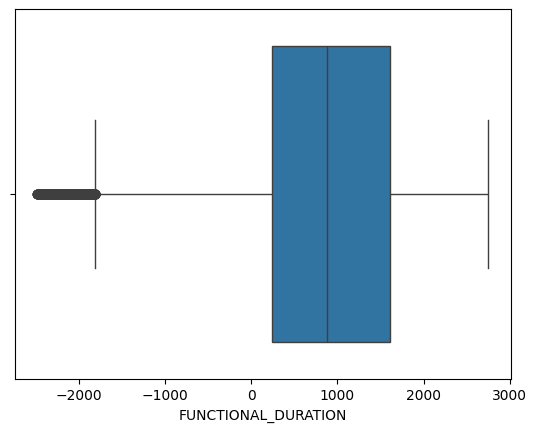

In [ ]:
# Visualize the distribution using a box plot:
sns.boxplot(x=df['FUNCTIONAL_DURATION'])

### Execution Time Pattern

In [ ]:
# Yearly distribution
df['EXECUTION_START_DATE'].dt.year.value_counts().sort_index()

,count
EXECUTION_START_DATE,
2013,1
2016,20925
2017,118305
2018,194641
2019,203767
2020,185807
2021,182353
2022,176190
2023,200874


In [ ]:
df.groupby(df['EXECUTION_START_DATE'].dt.year)['EXECUTION_START_DATE'].agg(min_exec_date='min', max_exec_date='max')

,min_exec_date,max_exec_date
EXECUTION_START_DATE,,
2013,2013-08-19,2013-08-19
2016,2016-07-25,2016-12-31
2017,2017-01-01,2017-12-31
2018,2018-01-01,2018-12-31
2019,2019-01-01,2019-12-31
2020,2020-01-01,2020-12-31
2021,2021-01-01,2021-12-31
2022,2022-01-01,2022-12-31
2023,2023-01-01,2023-12-31


In [ ]:
df.groupby(df['PRODUCTION_LOCATION'])['EXECUTION_START_DATE'].agg(min_exec_date='min', max_exec_date='max')

,min_exec_date,max_exec_date
PRODUCTION_LOCATION,,
COTA,2017-10-27,2024-08-29
MONACO,2018-02-24,2024-08-29
MONZA,2017-02-25,2024-08-30
ROMA,2017-08-09,2024-08-29
SILVERSTONE,2013-08-19,2024-08-30
SUZUKA,2017-04-18,2024-08-30


<Axes: xlabel='EXECUTION_START_DATE', ylabel='count'>

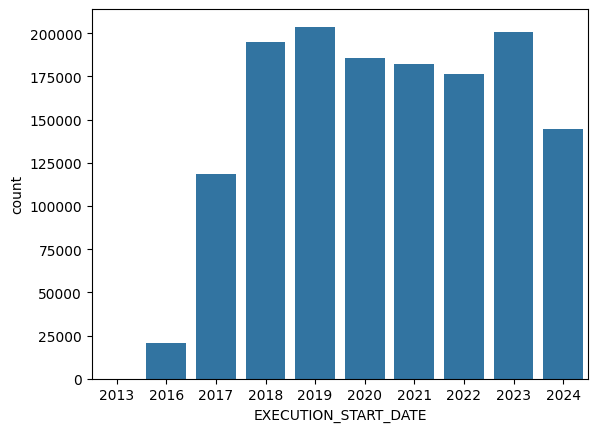

In [ ]:
sns.barplot(x=df['EXECUTION_START_DATE'].dt.year.value_counts().sort_index().index, y=df['EXECUTION_START_DATE'].dt.year.value_counts().sort_index())

In [ ]:
# Monthly distribution
df['EXECUTION_START_DATE'].dt.month.value_counts().sort_index()

,count
EXECUTION_START_DATE,
1,116461
2,111715
3,123577
4,119116
5,126257
6,124373
7,120954
8,135921
9,113087


<Axes: xlabel='EXECUTION_START_DATE', ylabel='count'>

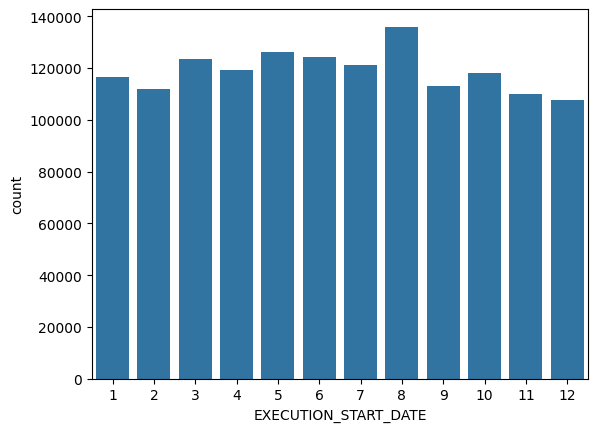

In [ ]:
sns.barplot(x=df['EXECUTION_START_DATE'].dt.month.value_counts().sort_index().index, y=df['EXECUTION_START_DATE'].dt.month.value_counts().sort_index())

In [ ]:
# Day of week distribution
df['EXECUTION_START_DATE'].dt.day_of_week.value_counts().sort_index()

,count
EXECUTION_START_DATE,
0,222175
1,265447
2,269498
3,261617
4,241928
5,95907
6,70692


<Axes: xlabel='EXECUTION_START_DATE', ylabel='count'>

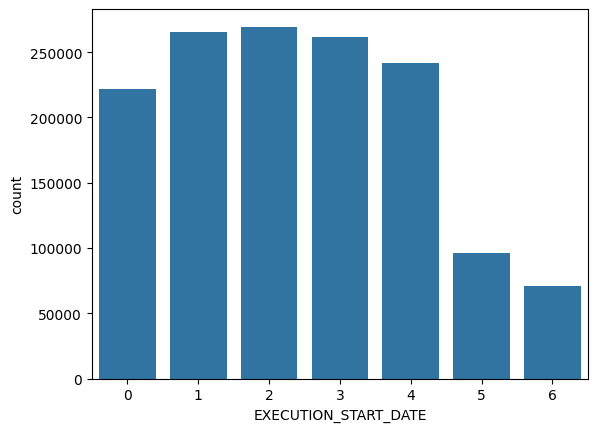

In [ ]:
sns.barplot(x=df['EXECUTION_START_DATE'].dt.day_of_week.value_counts().sort_index().index, y=df['EXECUTION_START_DATE'].dt.day_of_week.value_counts().sort_index())

### Production Location (Plant) Distribution

In [ ]:
# Production Location distribution
df['PRODUCTION_LOCATION'].value_counts()

,count
PRODUCTION_LOCATION,
SILVERSTONE,630903
SUZUKA,290975
MONZA,225279
COTA,116303
MONACO,84694
ROMA,79110


In [ ]:
# Production Location proportion
df['PRODUCTION_LOCATION'].value_counts()/len(df)*100

,count
PRODUCTION_LOCATION,
SILVERSTONE,44.203665
SUZUKA,20.386908
MONZA,15.783975
COTA,8.148668
MONACO,5.934011
ROMA,5.542773


<Axes: xlabel='PRODUCTION_LOCATION', ylabel='count'>

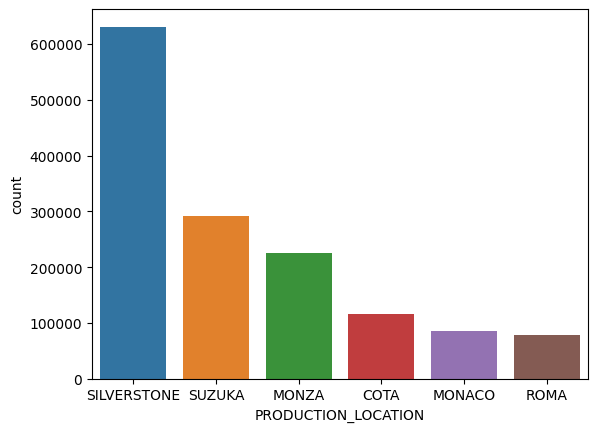

In [ ]:
sns.barplot(x=df['PRODUCTION_LOCATION'].value_counts().index, y=df['PRODUCTION_LOCATION'].value_counts(), hue=df['PRODUCTION_LOCATION'].value_counts().index)

### Actual work time in minutes

In [ ]:
# Actual working time distribution
df['ACTUAL_WORK_IN_MINUTES'].describe()

,ACTUAL_WORK_IN_MINUTES
count,1.427264e+06
mean,8.862968e+01
std,8.037915e+02
min,0.000000e+00
25%,1.200000e+01
50%,4.800000e+01
75%,9.000000e+01
max,3.301848e+05


In [ ]:
print(f"Minimum: {df['ACTUAL_WORK_IN_MINUTES'].min()}")
print(f"Medium: {df['ACTUAL_WORK_IN_MINUTES'].median()}")
print(f"Average: {df['ACTUAL_WORK_IN_MINUTES'].mean()}")
print(f"Maximum: {df['ACTUAL_WORK_IN_MINUTES'].max()}")

Minimum: 0.0
Medium: 48.0
Average: 88.62968378660146
Maximum: 330184.8


<Axes: >

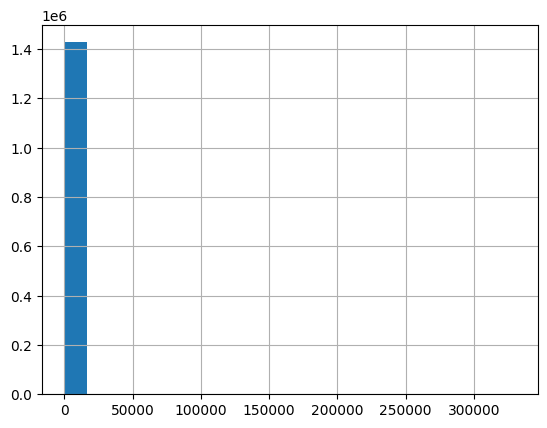

In [ ]:
# Histogram
df['ACTUAL_WORK_IN_MINUTES'].hist(bins=20)

In [ ]:
df['ACTUAL_WORK_IN_MINUTES'].groupby(df['PRODUCTION_LOCATION']).median().sort_values(ascending=False)

,ACTUAL_WORK_IN_MINUTES
PRODUCTION_LOCATION,
SUZUKA,60.0
SILVERSTONE,54.0
MONZA,44.0
COTA,31.2
ROMA,18.0
MONACO,3.6


In [ ]:
df['ACTUAL_WORK_IN_MINUTES'].groupby(df['MAINTENANCE_ACTIVITY_TYPE']).median().sort_values(ascending=False)

,ACTUAL_WORK_IN_MINUTES
MAINTENANCE_ACTIVITY_TYPE,
Unplanned,52.0
Planned,30.0


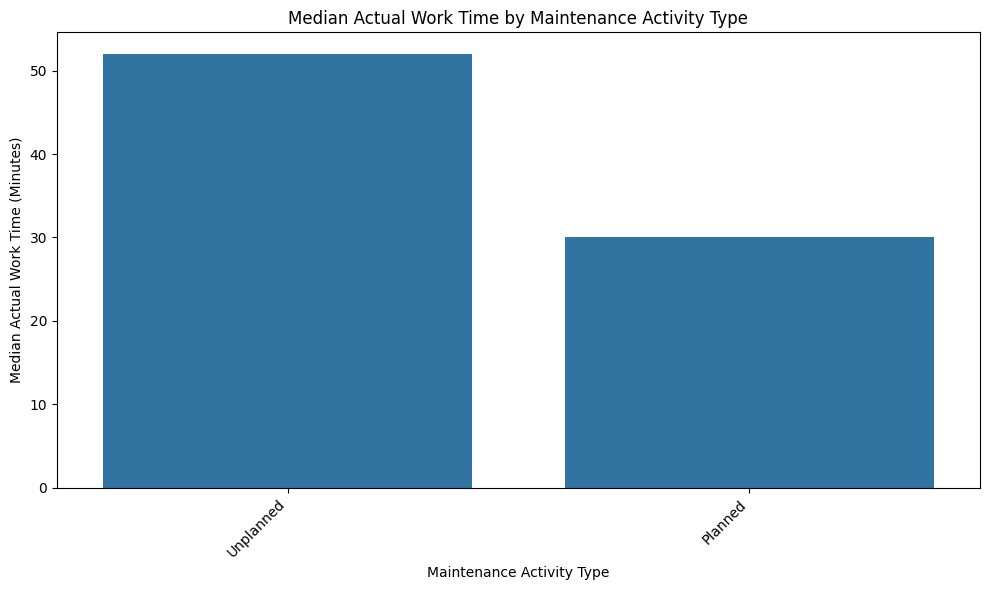

In [ ]:
# Calculate the median 'ACTUAL_WORK_IN_MINUTES' for each 'MAINTENANCE_ACTIVITY_TYPE'
median_work_time = df['ACTUAL_WORK_IN_MINUTES'].groupby(df['MAINTENANCE_ACTIVITY_TYPE']).median().sort_values(ascending=False)


# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=median_work_time.index, y=median_work_time.values)
plt.xlabel('Maintenance Activity Type')
plt.ylabel('Median Actual Work Time (Minutes)')
plt.title('Median Actual Work Time by Maintenance Activity Type')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [ ]:
df['ACTUAL_WORK_IN_MINUTES'].groupby([df['PRODUCTION_LOCATION'], df['MAINTENANCE_ACTIVITY_TYPE']]).median()

PRODUCTION_LOCATION  MAINTENANCE_ACTIVITY_TYPE
COTA                 Planned                       65.901245
                     Unplanned                     59.204271
MONACO               Planned                       59.004368
                     Unplanned                     66.459994
MONZA                Planned                       38.065967
                     Unplanned                    110.385985
ROMA                 Planned                       41.892112
                     Unplanned                     53.163754
SILVERSTONE          Planned                       49.038096
                     Unplanned                     96.164130
SUZUKA               Planned                       49.543921
                     Unplanned                    103.718435
Name: ACTUAL_WORK_IN_MINUTES, dtype: float64

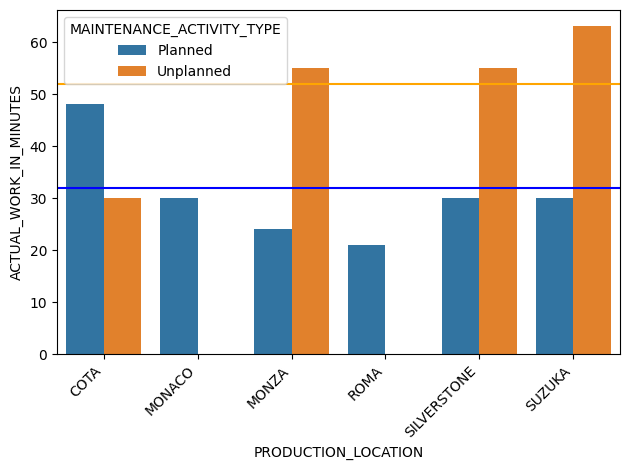

In [ ]:
grouped_data = df['ACTUAL_WORK_IN_MINUTES'].groupby([df['PRODUCTION_LOCATION'], df['MAINTENANCE_ACTIVITY_TYPE']]).median().reset_index()

# Create the bar plot
sns.barplot(x='PRODUCTION_LOCATION', y='ACTUAL_WORK_IN_MINUTES', hue='MAINTENANCE_ACTIVITY_TYPE', data=grouped_data)
plt.axhline(y=52, color='orange')
plt.axhline(y=32, color='blue')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

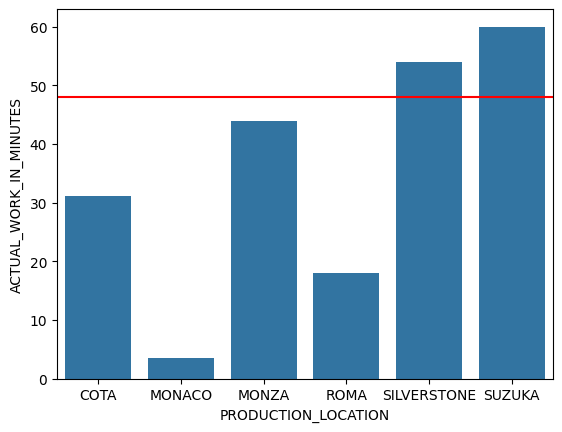

In [ ]:
sns.barplot(x=df['ACTUAL_WORK_IN_MINUTES'].groupby(df['PRODUCTION_LOCATION']).median().index, y=df['ACTUAL_WORK_IN_MINUTES'].groupby(df['PRODUCTION_LOCATION']).median())
plt.axhline(y=48, color='r')

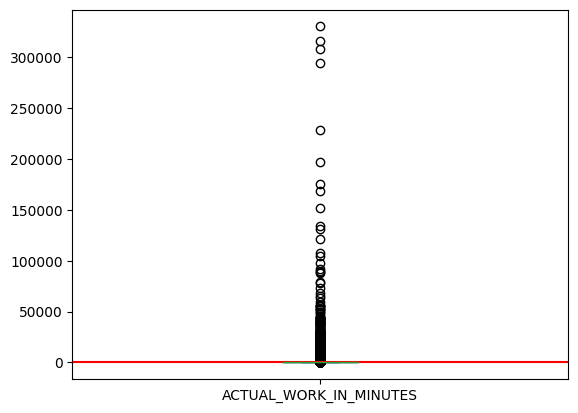

In [ ]:
# Box plot
df['ACTUAL_WORK_IN_MINUTES'].plot(kind='box')
plt.axhline(y=48, color='r')

In [ ]:
df['ACTUAL_WORK_IN_MINUTES'].groupby(df['PRODUCTION_LOCATION']).describe()

,count,mean,std,min,25%,50%,75%,max
PRODUCTION_LOCATION,,,,,,,,
COTA,116303.0,60.720869,108.688678,0.0,0.0,31.2,72.0,10219.2
MONACO,84694.0,65.742548,251.565982,0.0,0.0,3.6,60.0,17241.0
MONZA,225279.0,94.765588,872.696258,0.0,6.0,44.0,88.0,330184.8
ROMA,79110.0,50.140030,143.771203,0.0,0.0,18.0,60.0,13200.0
SILVERSTONE,630903.0,94.086904,1039.848074,0.0,15.0,54.0,92.0,315747.6
SUZUKA,290975.0,100.328048,452.896950,0.0,24.0,60.0,112.0,197230.8


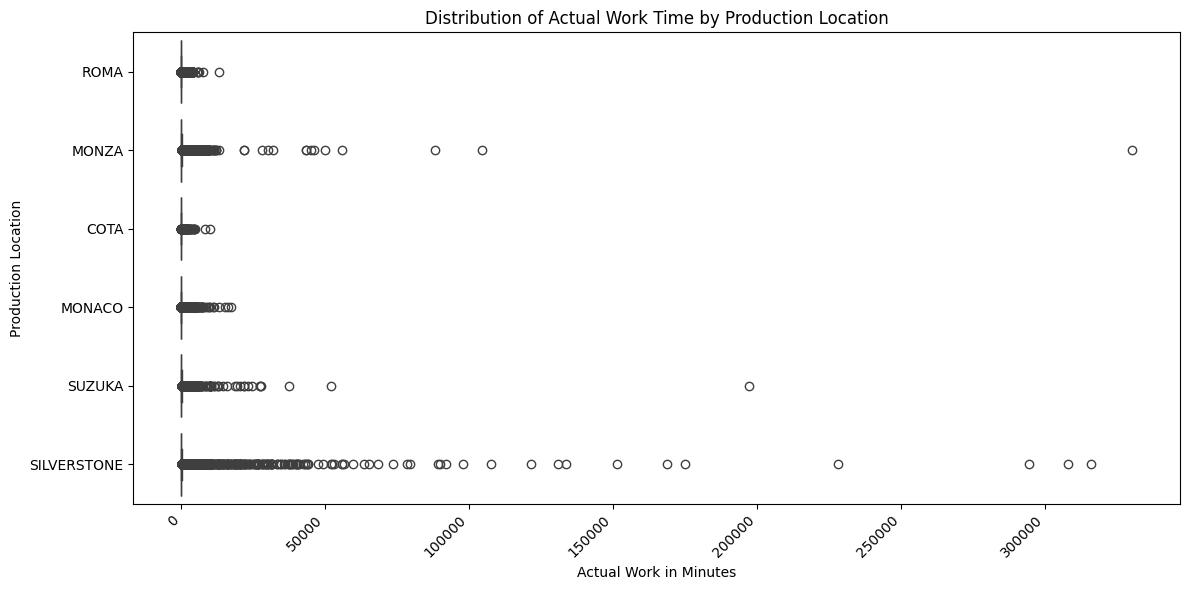

In [ ]:
# Create the box plot
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.boxplot(x='ACTUAL_WORK_IN_MINUTES', y='PRODUCTION_LOCATION', data=df)
plt.xlabel('Actual Work in Minutes')
plt.ylabel('Production Location')
plt.title('Distribution of Actual Work Time by Production Location')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

### Maintainance Activity Type (Planned vs Unplanned)


In [ ]:
# Planned vs Unplanned maintainance proportion comparison
df['MAINTENANCE_ACTIVITY_TYPE'].value_counts()/len(df)*100

,count
MAINTENANCE_ACTIVITY_TYPE,
Unplanned,89.463267
Planned,10.536733


Out of 1.4 millions ordered issues, around 90% of maintenance occurs with unplanned situation.

In [ ]:
# Planned vs Unplanned maintainance Actaul workimg time comparison (Mean)
df.groupby('MAINTENANCE_ACTIVITY_TYPE')['ACTUAL_WORK_IN_MINUTES'].mean()

,ACTUAL_WORK_IN_MINUTES
MAINTENANCE_ACTIVITY_TYPE,
Planned,48.034311
Unplanned,93.410893


In terms of average time, unplanned maintenance order takes 2 times longer fixing period than planned one. (48 mins vs 94 mins)

In [ ]:
# Planned vs Unplanned maintainance Actaul workimg time comparison (Median)
df.groupby('MAINTENANCE_ACTIVITY_TYPE')['ACTUAL_WORK_IN_MINUTES'].median()

,ACTUAL_WORK_IN_MINUTES
MAINTENANCE_ACTIVITY_TYPE,
Planned,30.0
Unplanned,52.0


### Fuctional Location Code Frequency

Location Code consists of 5 different components.

plant – process – sub process – product line – machine

Location Code is broken into FUNCTIONAL_AREA_NODEs to better identify which components is causing the issue.

In [ ]:
#  Location-Code: plant – process – sub process – product line – machine
func_loc = []

for i in df['FUCTIONAL_LOC_SPLIT'].tolist():
  # Check if 'i' is iterable before extending
  if isinstance(i, (list, tuple)):
    func_loc.extend(i)
  # If 'i' is not iterable and not NaN, append it as a single element
  elif i is not np.nan:
    func_loc.append(i)

func_loc = pd.Series(func_loc)
func_loc.value_counts().nlargest(10)

,count
PRD,288793
L30,132272
L15,103531
G816,70188
L02,66760
L01,63482
G261,62625
G291,58343
L03,47422
L080,46355


In [ ]:
(func_loc.value_counts()/ (len(df) * (1 - .79556550)) * 100).nlargest(10)

,count
PRD,98.975604
L30,45.332474
L15,35.482312
G816,24.054945
L02,22.880095
L01,21.756654
G261,21.462941
G291,19.995407
L03,16.252545
L080,15.886861


In [ ]:
def func_area_code_explore(df = df, code = '', sample = 50):
  df.loc[df['FUNCTIONAL_LOC'].str.contains(code, na=False), df.columns[df.columns.str.contains('FUNCTIONAL_AREA')]].sample(sample)

In [ ]:
# L30 = Bottle Line
df.loc[df['FUNCTIONAL_LOC'].str.contains('L30', na=False), df.columns[df.columns.str.contains('FUNCTIONAL')]].sample(10)

,FUNCTIONAL_LOC,FUNCTIONAL_AREA_NODE_1_MODIFIED,FUNCTIONAL_AREA_NODE_2_MODIFIED,FUNCTIONAL_AREA_NODE_3_MODIFIED,FUNCTIONAL_AREA_NODE_4_MODIFIED,FUNCTIONAL_AREA_NODE_5_MODIFIED,FUNCTIONAL_DURATION
533456,G811-PRD-L30-L03-L080,PRODUCTION,"LINE 2,3 PET BOTTLE LINES",LINE 3 SMALL PET,FILLER,NaN,NaN
749638,G811-PRD-L30-L03-L130,PRODUCTION,"LINE 2,3 PET BOTTLE LINES",LINE 3 SMALL PET,PALLETIZER,NaN,NaN
934986,G291-PRD-L30-L01-L080,MONZA PRODUCTION,BTL_PET_LINE,LINE #1 - FILLER_ROT_BTL_PET,FILLER,NaN,230.0
1241352,G816-PRD-L30-L02-L030,COTA PRODUCTION,BOTTLE LINE,LINE #2 - BOTTLE_LINE_PET,CONVEYOR,NaN,NaN
934604,G291-PRD-L30-L01-L080,MONZA PRODUCTION,BTL_PET_LINE,LINE #1 - FILLER_ROT_BTL_PET,FILLER,NaN,1552.0
621961,G812-PRD-L30-L02-L080,PRODUCTION,G812 PRD FILLER_ROT_BTL_PET,G812 PRD FILLER_ROT_BTL_PET LINE 2,FILLER,NaN,NaN
838640,G261-PRD-L30-L09-L130,SILVERSTONE PRODUCTION,"LINES 1,2,9 - BOTTLE LINES",LINE #9 - ROT_BTL_PET,PALLETIZER,NaN,NaN
1066821,G291-PRD-L30-L02-L080,MONZA PRODUCTION,BTL_PET_LINE,LINE #2 - FILLER_ROT_BTL_PET,FILLER,NaN,2294.0
750894,G816-PRD-L30-L04-L020,COTA PRODUCTION,BOTTLE LINE,LINE #4 - BOTTLE_LINE_PET,CODER,NaN,NaN
272515,G261-PRD-L30-L01-L030,SILVERSTONE PRODUCTION,"LINES 1,2,9 - BOTTLE LINES",LINE #1 - ROT_BTL_PET,CONVEYOR,NaN,NaN


In [ ]:
# L15 = Can Line
df.loc[df['FUNCTIONAL_LOC'].str.contains('L15', na=False), df.columns[df.columns.str.contains('FUNCTIONAL')]].sample(10)

,FUNCTIONAL_LOC,FUNCTIONAL_AREA_NODE_1_MODIFIED,FUNCTIONAL_AREA_NODE_2_MODIFIED,FUNCTIONAL_AREA_NODE_3_MODIFIED,FUNCTIONAL_AREA_NODE_4_MODIFIED,FUNCTIONAL_AREA_NODE_5_MODIFIED,FUNCTIONAL_DURATION
222393,G816-PRD-L15-L03-L140,COTA PRODUCTION,CAN LINE,LINE #3-CAN_LINE,RINSER,NaN,NaN
360137,G816-PRD-L15-L03-L070,COTA PRODUCTION,CAN LINE,LINE #3-CAN_LINE,"DETECTOR, PRODUCT",NaN,NaN
889370,G291-PRD-L15-L04-L120,MONZA PRODUCTION,ROTARY_CAN_LINE,LINE #4-FILLER_ROTARY_CAN,PACKER,NaN,-2061.0
180142,G816-PRD-L15-L01-L030,COTA PRODUCTION,CAN LINE,LINE #1-CAN_LINE,CONVEYOR,NaN,NaN
267790,G221-PRD-L15-L04-L080,SUZUKA PRODUCTION,L4 - FILLER_ROTARY_CAN,LINE #4-FILLER_ROTARY_CAN,FILLER,NaN,NaN
889492,G291-PRD-L15-L04-L120,MONZA PRODUCTION,ROTARY_CAN_LINE,LINE #4-FILLER_ROTARY_CAN,PACKER,NaN,-1680.0
1202721,G291-PRD-L15-L04-L030,MONZA PRODUCTION,ROTARY_CAN_LINE,LINE #4-FILLER_ROTARY_CAN,CONVEYOR,NaN,2534.0
1065042,G812-PRD-L15-L03-L080,PRODUCTION,G812 PRD FILLER_ROTARY_CAN,G812 PRD FILLER_ROTARY_CAN LINE 3,FILLER,NaN,898.0
888850,G291-PRD-L15-L04-L120-MEAD,MONZA PRODUCTION,ROTARY_CAN_LINE,LINE #4-FILLER_ROTARY_CAN,PACKER,"PACKER 1, MODEL DUODOZEN 1250SX",257.0
1108103,G812-PRD-L15-L03-L130,PRODUCTION,G812 PRD FILLER_ROTARY_CAN,G812 PRD FILLER_ROTARY_CAN LINE 3,PALLETIZER,NaN,NaN


In [ ]:
# G816 = COTA Production
df.loc[df['FUNCTIONAL_LOC'].str.contains('G816', na=False), df.columns[df.columns.str.contains('FUNCTIONAL')]].sample(10)

,FUNCTIONAL_LOC,FUNCTIONAL_AREA_NODE_1_MODIFIED,FUNCTIONAL_AREA_NODE_2_MODIFIED,FUNCTIONAL_AREA_NODE_3_MODIFIED,FUNCTIONAL_AREA_NODE_4_MODIFIED,FUNCTIONAL_AREA_NODE_5_MODIFIED,FUNCTIONAL_DURATION
669321,G816-PRD-L30-L02-L030,COTA PRODUCTION,BOTTLE LINE,LINE #2 - BOTTLE_LINE_PET,CONVEYOR,NaN,NaN
1109648,G816-PRD-L15-L03-L030,COTA PRODUCTION,CAN LINE,LINE #3-CAN_LINE,CONVEYOR,NaN,NaN
844020,G816-PRD-L15-L03-L020,COTA PRODUCTION,CAN LINE,LINE #3-CAN_LINE,CODER,NaN,NaN
1725,G816-PRD-L15-L01-L080,COTA PRODUCTION,CAN LINE,LINE #1-CAN_LINE,FILLER,NaN,1258.0
708103,G816-PRD-L15-L03,COTA PRODUCTION,CAN LINE,LINE #3-CAN_LINE,NaN,NaN,NaN
315511,G816-PRD-P90,COTA PRODUCTION,WATER TREATMENT,NaN,NaN,NaN,NaN
1288103,G816-PRD-L30-L02-L120,COTA PRODUCTION,BOTTLE LINE,LINE #2 - BOTTLE_LINE_PET,PACKER,NaN,NaN
91585,G816-PRD-L15-L03-L120,COTA PRODUCTION,CAN LINE,LINE #3-CAN_LINE,PACKER,NaN,1438.0
797001,G816-PRD-L30-L02-L030,COTA PRODUCTION,BOTTLE LINE,LINE #2 - BOTTLE_LINE_PET,CONVEYOR,NaN,NaN
708083,G816-PRD-L30-L02-L030,COTA PRODUCTION,BOTTLE LINE,LINE #2 - BOTTLE_LINE_PET,CONVEYOR,NaN,NaN


In [ ]:
# L01 = Line #1
df.loc[df['FUNCTIONAL_LOC'].str.contains('L01', na=False), df.columns[df.columns.str.contains('FUNCTIONAL')]].sample(10)

,FUNCTIONAL_LOC,FUNCTIONAL_AREA_NODE_1_MODIFIED,FUNCTIONAL_AREA_NODE_2_MODIFIED,FUNCTIONAL_AREA_NODE_3_MODIFIED,FUNCTIONAL_AREA_NODE_4_MODIFIED,FUNCTIONAL_AREA_NODE_5_MODIFIED,FUNCTIONAL_DURATION
882581,G816-PRD-L15-L01-L080,COTA PRODUCTION,CAN LINE,LINE #1-CAN_LINE,FILLER,NaN,NaN
531739,G221-PRD-L30-L01-L120,SUZUKA PRODUCTION,"L1, L2, L6 PET BOTTLE LINES",LINE #1 - FILLER_ROT_BTL_PET,PACKER,NaN,NaN
885649,G261-PRD-L30-L01-L080,SILVERSTONE PRODUCTION,"LINES 1,2,9 - BOTTLE LINES",LINE #1 - ROT_BTL_PET,FILLER,NaN,NaN
707152,G816-PRD-L15-L01-L120,COTA PRODUCTION,CAN LINE,LINE #1-CAN_LINE,PACKER,NaN,NaN
1106693,G816-PRD-L15-L01-L130,COTA PRODUCTION,CAN LINE,LINE #1-CAN_LINE,PALLETIZER,NaN,NaN
2019,G816-PRD-L15-L01-L080,COTA PRODUCTION,CAN LINE,LINE #1-CAN_LINE,FILLER,NaN,890.0
1289108,G261-PRD-L30-L01-L030,SILVERSTONE PRODUCTION,"LINES 1,2,9 - BOTTLE LINES",LINE #1 - ROT_BTL_PET,CONVEYOR,NaN,NaN
1245683,G812-PRD-L15-L01-L170,PRODUCTION,G812 PRD FILLER_ROTARY_CAN,G812 PRD FILLER_ROTARY_CAN LINE 1,WARMER_COOLER,NaN,NaN
445923,G816-PRD-L15-L01-L070,COTA PRODUCTION,CAN LINE,LINE #1-CAN_LINE,"DETECTOR, PRODUCT",NaN,NaN
801194,G291-PRD-L30-L01-L100,MONZA PRODUCTION,BTL_PET_LINE,LINE #1 - FILLER_ROT_BTL_PET,LABELER,NaN,1265.0


In [ ]:
# L080 = FILLER
df.loc[df['FUNCTIONAL_LOC'].str.contains('L080', na=False), df.columns[df.columns.str.contains('FUNCTIONAL')]].sample(10)

,FUNCTIONAL_LOC,FUNCTIONAL_AREA_NODE_1_MODIFIED,FUNCTIONAL_AREA_NODE_2_MODIFIED,FUNCTIONAL_AREA_NODE_3_MODIFIED,FUNCTIONAL_AREA_NODE_4_MODIFIED,FUNCTIONAL_AREA_NODE_5_MODIFIED,FUNCTIONAL_DURATION
575793,G816-PRD-L15-L03-L080,COTA PRODUCTION,CAN LINE,LINE #3-CAN_LINE,FILLER,NaN,NaN
752711,G812-PRD-L30-L02-L080,PRODUCTION,G812 PRD FILLER_ROT_BTL_PET,G812 PRD FILLER_ROT_BTL_PET LINE 2,FILLER,NaN,NaN
669044,G816-PRD-L30-L02-L080,COTA PRODUCTION,BOTTLE LINE,LINE #2 - BOTTLE_LINE_PET,FILLER,NaN,NaN
1068029,G291-PRD-L30-L02-L080,MONZA PRODUCTION,BTL_PET_LINE,LINE #2 - FILLER_ROT_BTL_PET,FILLER,NaN,2420.0
1068104,G291-PRD-L30-L02-L080,MONZA PRODUCTION,BTL_PET_LINE,LINE #2 - FILLER_ROT_BTL_PET,FILLER,NaN,567.0
403853,G261-PRD-L30-L02-L080,SILVERSTONE PRODUCTION,"LINES 1,2,9 - BOTTLE LINES",LINE #2 - ROT_BTL_PET,FILLER,NaN,NaN
317307,G261-PRD-L30-L09-L080,SILVERSTONE PRODUCTION,"LINES 1,2,9 - BOTTLE LINES",LINE #9 - ROT_BTL_PET,FILLER,NaN,NaN
1426747,G816-PRD-L30-L02-L080,COTA PRODUCTION,BOTTLE LINE,LINE #2 - BOTTLE_LINE_PET,FILLER,NaN,NaN
664525,G811-PRD-L30-L02-L080,PRODUCTION,"LINE 2,3 PET BOTTLE LINES",LINE 2 LARGET PET,FILLER,NaN,NaN
935261,G291-PRD-L30-L01-L080,MONZA PRODUCTION,BTL_PET_LINE,LINE #1 - FILLER_ROT_BTL_PET,FILLER,NaN,385.0


## Machine (Functional area node #4) distribution

In [ ]:
df['FUNCTIONAL_AREA_NODE_4_MODIFIED'].value_counts().sort_values(ascending=False).head(10)

,count
FUNCTIONAL_AREA_NODE_4_MODIFIED,
FILLER,46322
PACKER,35230
CONVEYOR,34765
LABELER,18945
PALLETIZER,16239
DEPALLETIZER,10850
"DETECTOR, PRODUCT",9404
"SEAMER, ROTARY",8510
CAPPER,8350


In [ ]:
(df['FUNCTIONAL_AREA_NODE_4_MODIFIED'].value_counts()/len(df['FUNCTIONAL_AREA_NODE_4_MODIFIED'].dropna()) * 100).sort_values(ascending=False).head(10)

,count
FUNCTIONAL_AREA_NODE_4_MODIFIED,
FILLER,19.498007
PACKER,14.829126
CONVEYOR,14.633397
LABELER,7.974391
PALLETIZER,6.835373
DEPALLETIZER,4.567017
"DETECTOR, PRODUCT",3.958362
"SEAMER, ROTARY",3.582057
CAPPER,3.514709


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'FILLER'),
  Text(1, 0, 'PACKER'),
  Text(2, 0, 'CONVEYOR'),
  Text(3, 0, 'LABELER'),
  Text(4, 0, 'PALLETIZER'),
  Text(5, 0, 'DEPALLETIZER'),
  Text(6, 0, 'DETECTOR, PRODUCT'),
  Text(7, 0, 'SEAMER, ROTARY'),
  Text(8, 0, 'CAPPER'),
  Text(9, 0, 'WARMER_COOLER')])

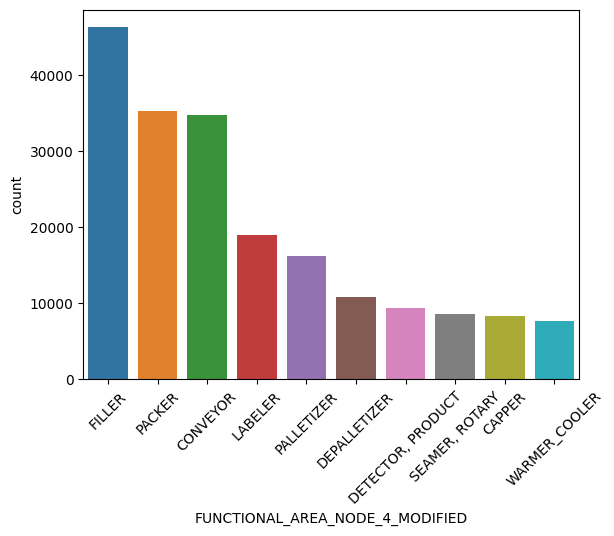

In [ ]:
sns.barplot(x=df['FUNCTIONAL_AREA_NODE_4_MODIFIED'].value_counts().sort_values(ascending=False).head(10).index, y=df['FUNCTIONAL_AREA_NODE_4_MODIFIED'].value_counts().sort_values(ascending=False).head(10), hue= df['FUNCTIONAL_AREA_NODE_4_MODIFIED'].value_counts().sort_values(ascending=False).head(10).index)
plt.xticks(rotation=45)

In [ ]:
df.groupby('PRODUCTION_LOCATION')['FUNCTIONAL_AREA_NODE_4_MODIFIED'].value_counts().sort_values(ascending=False).head(10)

PRODUCTION_LOCATION  FUNCTIONAL_AREA_NODE_4_MODIFIED
COTA                 FILLER                             14261
                     CONVEYOR                           11999
SILVERSTONE          FILLER                              9710
MONZA                FILLER                              9049
COTA                 PACKER                              8428
SILVERSTONE          PACKER                              8287
                     CONVEYOR                            8160
MONZA                CONVEYOR                            7724
SUZUKA               PACKER                              6852
                     FILLER                              6269
Name: count, dtype: int64

### Unplanned maintenance orders

In [ ]:
# Unplanned maintainance case per production location distribution
df.loc[df.MAINTENANCE_ACTIVITY_TYPE == 'Unplanned', 'PRODUCTION_LOCATION'].value_counts().sort_values(ascending=False)

,count
PRODUCTION_LOCATION,
SILVERSTONE,603094
SUZUKA,272765
MONZA,176621
COTA,89965
MONACO,76544
ROMA,57888


In [ ]:
# Unplanned maintainance proportion per production location distribution
df.loc[df.MAINTENANCE_ACTIVITY_TYPE == 'Unplanned', 'PRODUCTION_LOCATION'].value_counts() / df['PRODUCTION_LOCATION'].value_counts()

,count
PRODUCTION_LOCATION,
SILVERSTONE,0.955922
SUZUKA,0.937417
MONZA,0.784010
COTA,0.773540
MONACO,0.903771
ROMA,0.731741


In [ ]:
# Unplanned maintainance working time per production location distribution
df.loc[df.MAINTENANCE_ACTIVITY_TYPE == 'Unplanned'].groupby('PRODUCTION_LOCATION')['ACTUAL_WORK_IN_MINUTES'].median().sort_values(ascending=False)

,ACTUAL_WORK_IN_MINUTES
PRODUCTION_LOCATION,
SUZUKA,63.0
MONZA,55.0
SILVERSTONE,55.0
COTA,30.0
MONACO,0.0
ROMA,0.0


## Order Description

In [ ]:
df['ORDER_DESCRIPTION']

,ORDER_DESCRIPTION
0,L2 GEARBOX LEAK (SEE ATTACHED)
1,LINE 3 CONVEYOR AT CAN CODER
2,BROKEN CONVEYOR RAIL
3,LINE 3 CONVEYOR
4,REPLACED SONIC AIR BLOWER BELT
...,...
1427259,DTRINE
1427260,DTRINE
1427261,DTRINE
1427262,"FEED ROLLER BAD, REPLACED"


In [ ]:
desc_text = df['ORDER_DESCRIPTION'].str.cat(sep=' ')
desc_words = desc_text.split(' ')
pd.Series(desc_words).value_counts().sort_values(ascending = False).head(20)

,count
FOR,74266
WHILE,48313
MECH,39501
SHUTDOWN,24522
LUB,18260
ON,17744
AND,16240
TO,16178
LINE,15645
THE,15478


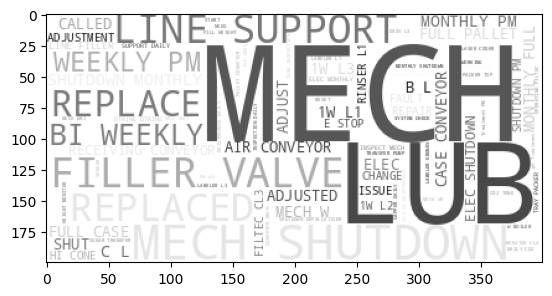

In [ ]:
desc_text = df['ORDER_DESCRIPTION'].str.cat(sep=' ')

wc = WordCloud(background_color='white', colormap = 'binary').generate(desc_text)
plt.imshow(wc)

## Summary

- Filler, Packer and Conveyor problems are 3 main causes for trackable maintanence issues, which takes almost 50% of 237,573 cases.
- SILVERSTONE plants has around 95% of unplanned issue occuring during the given period, which takes most